<a href="https://colab.research.google.com/github/welyab/learning-machining-learning/blob/main/introdu%C3%A7%C3%A3o_algoritmos_nao_supervisionados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd

In [6]:
uri_filmes = "https://raw.githubusercontent.com/oyurimatheus/clusterirng/master/movies/movies.csv"
filmes = pd.read_csv(uri_filmes)
filmes.columns = ["filme_id", "titulo", "generos"]
filmes.head()

,filme_id,titulo,generos
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [11]:
generos = filmes.generos.str.get_dummies()
generos.head()
dados_dos_filmes = pd.concat([filmes, generos], axis=1)
dados_dos_filmes.head()

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),Comedy|Romance,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
4,5,Father of the Bride Part II (1995),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
generos_escalados = scaler.fit_transform(generos)
generos_escalados.shape

(9742, 20)

In [16]:
from sklearn.cluster import KMeans

In [19]:
modelo = KMeans(n_clusters=3)
modelo.fit(generos_escalados)
print(f"Grupos {modelo.labels_}")

Grupos [1 1 0 ... 0 1 0]


In [24]:
print(generos.columns)
print(modelo.cluster_centers_)

Index(['(no genres listed)', 'Action', 'Adventure', 'Animation', 'Children',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir',
       'Horror', 'IMAX', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller',
       'War', 'Western'],
      dtype='object')
[[ 3.08748866e-02 -3.22975642e-01 -3.03642456e-01 -2.22601300e-01
  -1.90496700e-01  1.38230466e-01 -3.74156120e-01  1.07449455e-01
   1.03709297e-01 -1.80784316e-01 -9.49256298e-02  1.83493697e-02
  -1.12321231e-01  5.58876786e-03 -2.45339158e-01  1.38080469e-01
  -1.70336163e-01 -2.20892053e-01  5.95251563e-02  1.23409410e-02]
 [-5.91799474e-02  8.60730938e-01  1.47900731e+00  1.11699086e+00
   1.01395197e+00 -1.73864424e-01 -3.40914309e-01 -2.11562775e-01
  -5.78478188e-01  9.14469208e-01 -8.83844062e-02 -1.25186045e-01
   5.29301015e-01  1.46398486e-01 -1.66290032e-01 -2.78029110e-01
   8.35808438e-01 -9.62936209e-02 -5.30071097e-02  6.81800229e-04]
 [-5.91799474e-02  3.90088796e-01 -2.67911294e-01 -2.274149

In [27]:
grupos = pd.DataFrame(
    modelo.cluster_centers_,
    columns=generos.columns
)
grupos

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0.030875,-0.322976,-0.303642,-0.222601,-0.190497,0.138230,-0.374156,0.107449,0.103709,-0.180784,-0.094926,0.018349,-0.112321,0.005589,-0.245339,0.138080,-0.170336,-0.220892,0.059525,0.012341
1,-0.059180,0.860731,1.479007,1.116991,1.013952,-0.173864,-0.340914,-0.211563,-0.578478,0.914469,-0.088384,-0.125186,0.529301,0.146398,-0.166290,-0.278029,0.835808,-0.096294,-0.053007,0.000682
2,-0.059180,0.390089,-0.267911,-0.227415,-0.249628,-0.351266,1.719728,-0.200643,0.160980,-0.191622,0.438098,0.050119,-0.082235,-0.159578,1.073401,-0.252008,-0.156091,0.915818,-0.171979,-0.046714


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feebf325d68>,
      dtype=object)

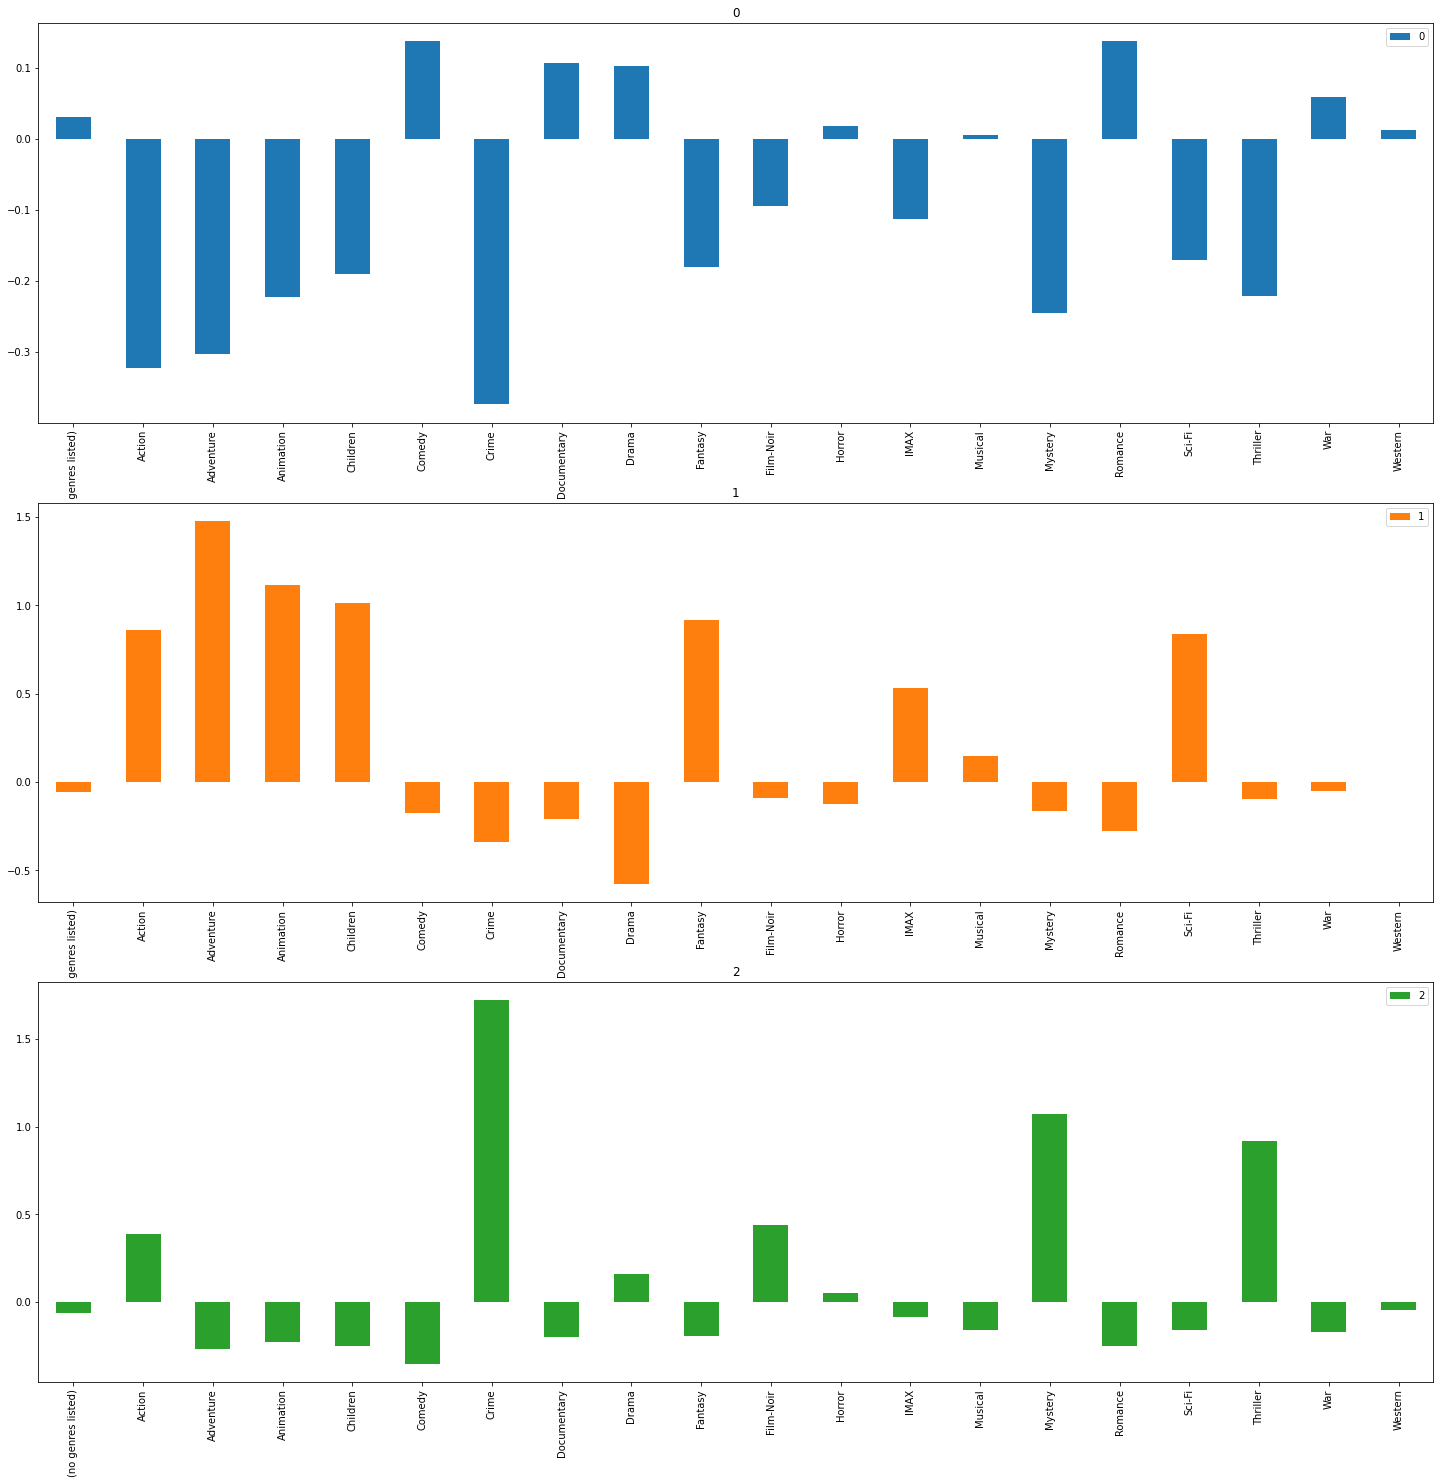

In [37]:
grupos.transpose().plot.bar(
    subplots=True, 
    figsize=(25, 25),
    sharex=False
)

In [38]:
grupo = 0
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)

,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
5440,25996,"Star Is Born, A (1954)",Drama|Musical,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
9217,152037,Grease Live (2016),(no genres listed),1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7464,81831,"First Beautiful Thing, The (La prima cosa bell...",Comedy|Drama,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6397,50796,Blood and Chocolate (2007),Drama|Fantasy|Horror|Romance,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0
4817,7177,Osama (2003),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8609,118248,Dying of the Light (2014),Drama|Thriller,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
7345,78160,Ricky Gervais Live: Animals (2003),Comedy,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8948,136564,Macbeth (2015),Drama,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4873,7303,The Diary of Anne Frank (1959),Drama|War,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2127,2827,"Astronaut's Wife, The (1999)",Horror|Sci-Fi|Thriller,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0


In [40]:
from sklearn.manifold import TSNE

In [42]:
tsne = TSNE()
visualizacao = tsne.fit_transform(generos_escalados)
visualizacao

array([[ 22.93467  ,  63.786144 ],
       [ 21.778013 , -44.668564 ],
       [-38.464287 , -22.418509 ],
       ...,
       [ -1.7846406,  14.81103  ],
       [  3.7604582,  44.681538 ],
       [  1.130598 , -27.393053 ]], dtype=float32)

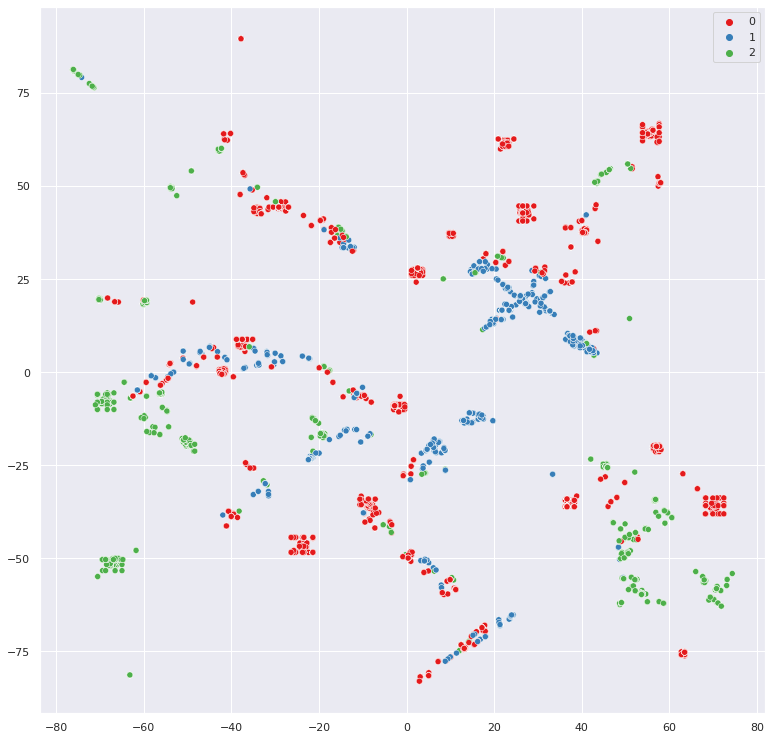

In [46]:
import seaborn as sns
sns.set(rc={'figure.figsize': (13, 13)})
sns.scatterplot(
    x=visualizacao[:, 0], 
    y=visualizaaco[:, 1],
    hue=modelo.labels_,
    palette=sns.color_palette('Set1', 3)
)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feebdb3ee48>,
      dtype=object)

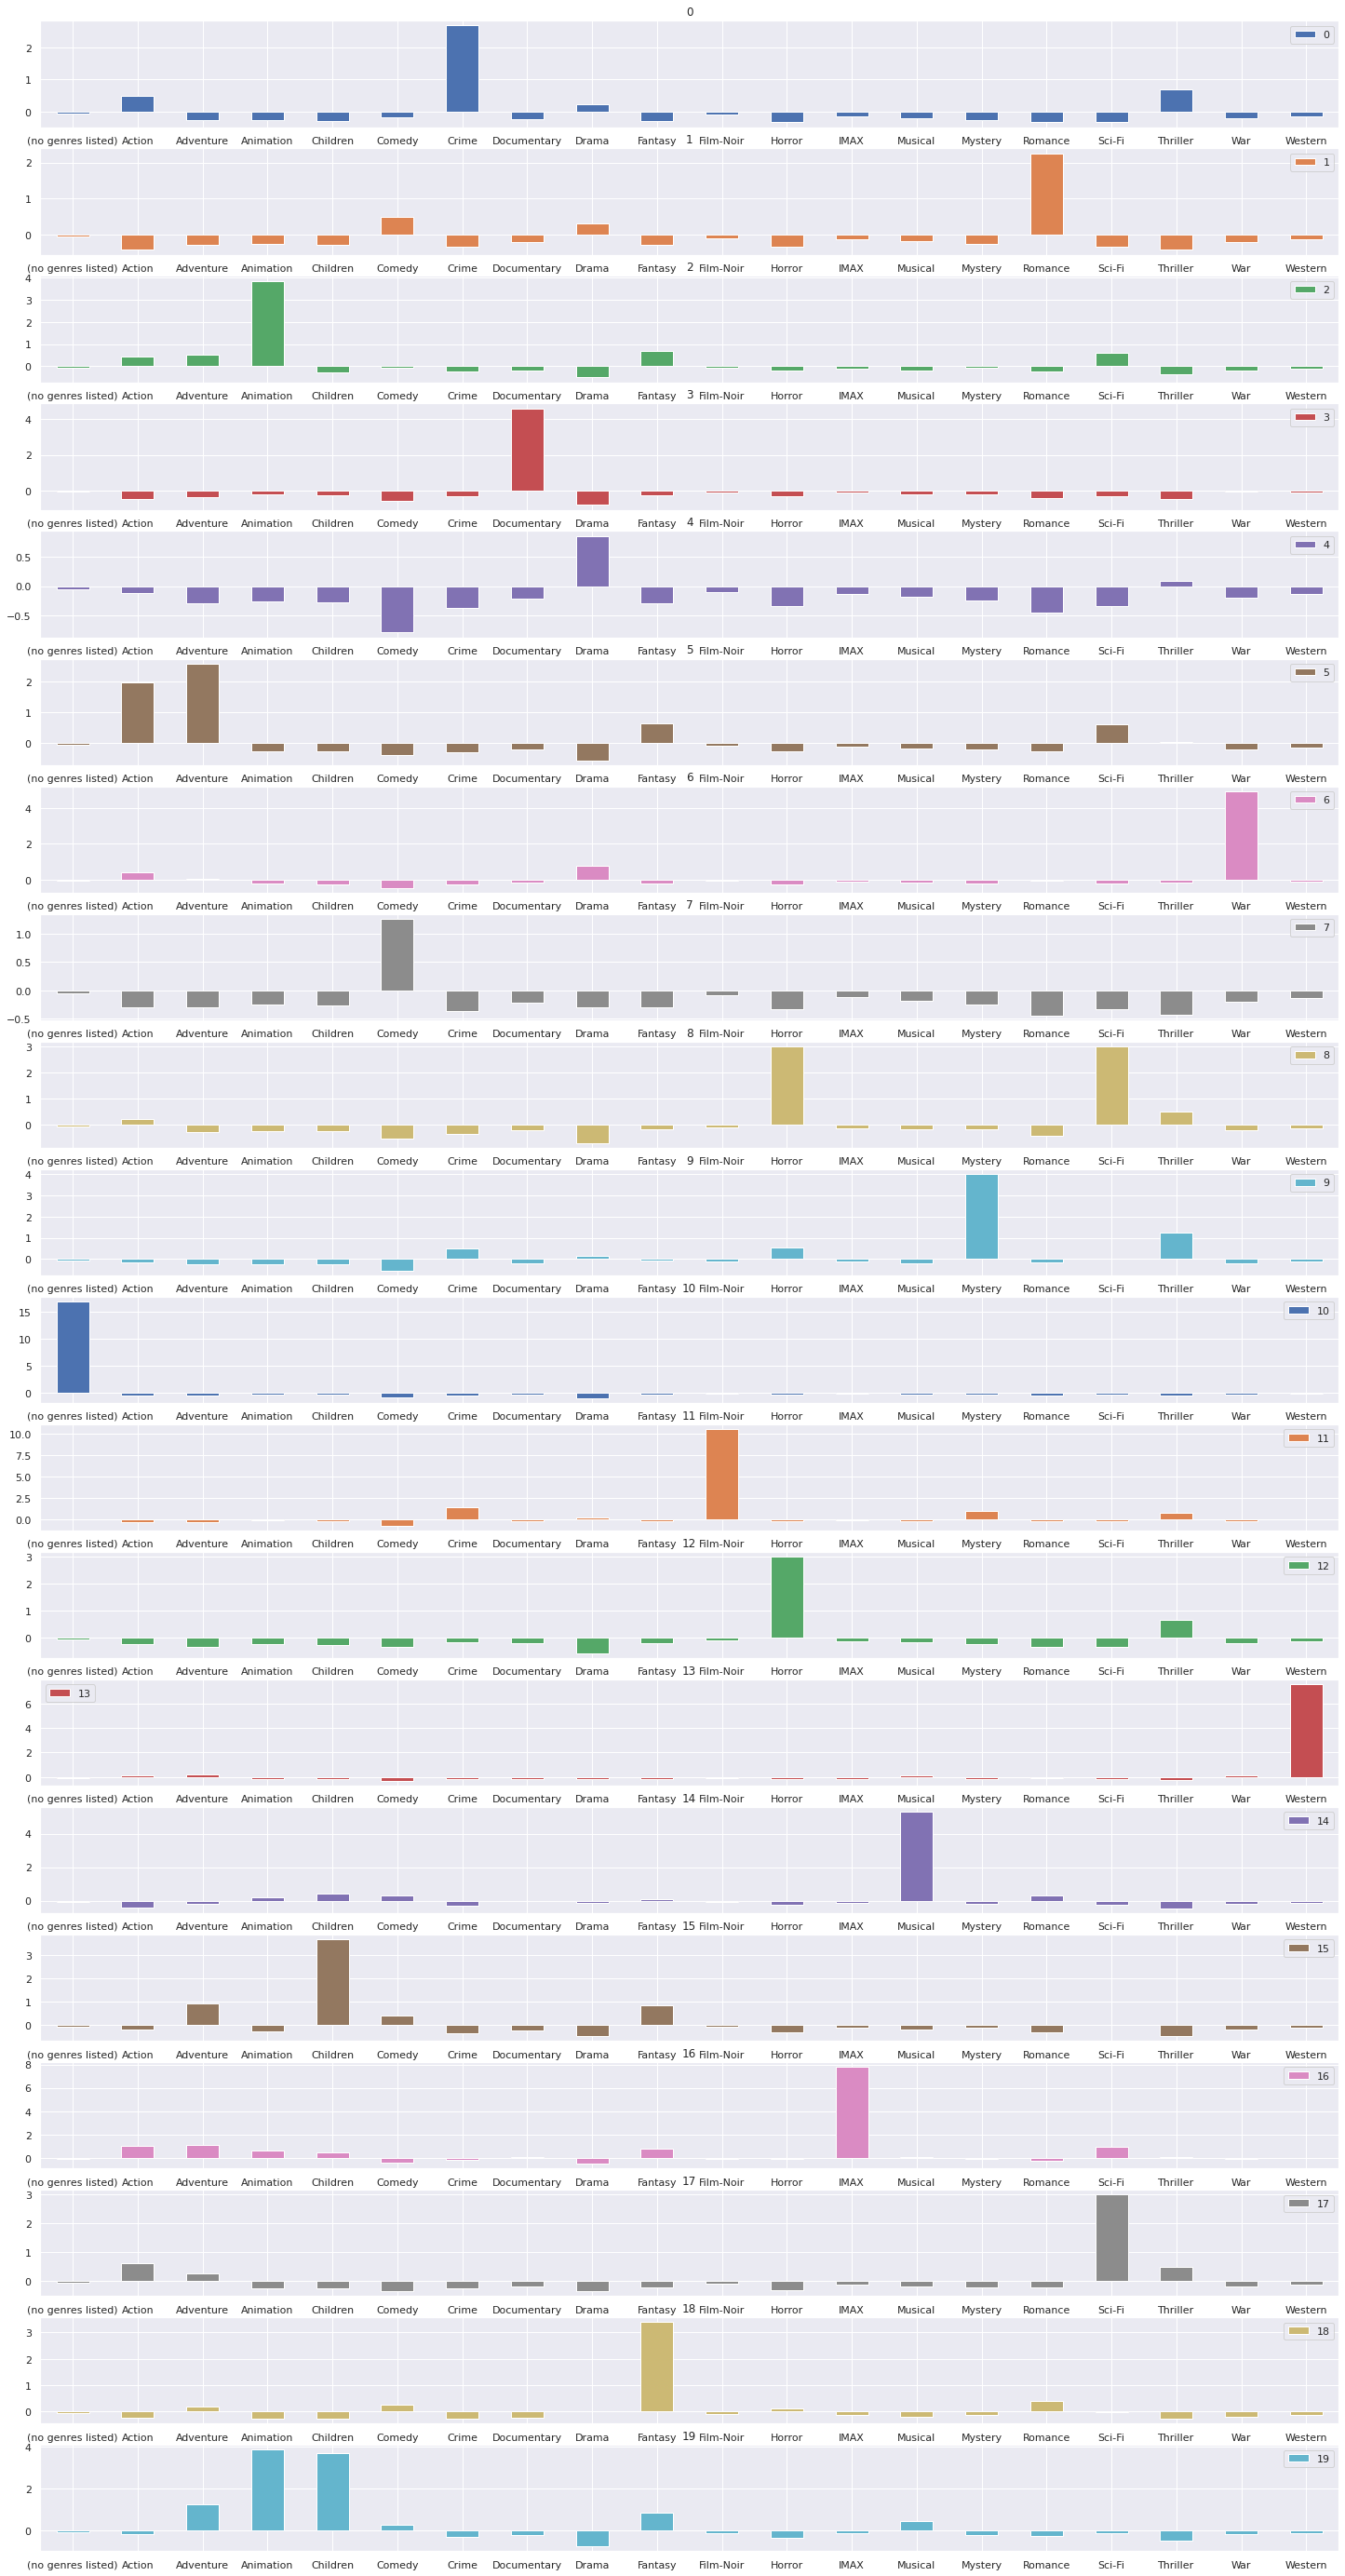

In [53]:
modelo = KMeans(n_clusters=20)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)

In [56]:
grupo = 15
filtro = modelo.labels_ == grupo
dados_dos_filmes[filtro].sample(10)


,filme_id,titulo,generos,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
504,586,Home Alone (1990),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8908,135216,The Star Wars Holiday Special (1978),Adventure|Children|Comedy|Sci-Fi,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
9233,152658,Santa's Little Helper (2015),Children,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6014,37857,MirrorMask (2005),Adventure|Children|Drama|Fantasy,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
9428,166203,Sapphire Blue (2014),Adventure|Children|Fantasy|Sci-Fi,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1195,1592,Air Bud (1997),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1338,1812,Wide Awake (1998),Children|Comedy|Drama,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4859,7262,Catch That Kid (2004),Action|Adventure|Children|Comedy|Crime,0,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
9454,167790,The Good Boy (2016),Children|Comedy|Drama,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
5944,34321,Bad News Bears (2005),Children|Comedy,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [62]:
def kmeans(numero_de_clusters, generos):
  modelo = KMeans(n_clusters=numero_de_clusters)
  modelo.fit(generos)
  return [numero_de_clusters, modelo.inertia_]


In [64]:
kmeans(20, generos_escalados)

[20, 55022.39901898531]

In [66]:
kmeans(3, generos_escalados)

[3, 169270.52706115067]

In [68]:
resultado = [kmeans(numero_de_grupos, generos_escalados) for numero_de_grupos in range(1, 41)]
resultado

[[1, 194840.0],
 [2, 179559.0578232338],
 [3, 168334.9067913064],
 [4, 157475.72746213884],
 [5, 148586.6619540989],
 [6, 138464.89995762514],
 [7, 127224.23375381647],
 [8, 119839.41476365087],
 [9, 111947.50713125832],
 [10, 101777.53247459284],
 [11, 94955.76668163597],
 [12, 86809.31696978015],
 [13, 80444.33904493079],
 [14, 76580.17260570919],
 [15, 70188.26492606435],
 [16, 63741.21229583967],
 [17, 61455.18311839655],
 [18, 58125.258130397444],
 [19, 57485.287818694436],
 [20, 55301.95907323189],
 [21, 53583.120945031136],
 [22, 52348.110989800465],
 [23, 49870.70856263373],
 [24, 50214.381218258524],
 [25, 48852.921671139826],
 [26, 47527.76563814335],
 [27, 46278.141757004014],
 [28, 44734.57359401891],
 [29, 42794.85359079929],
 [30, 43431.3017207002],
 [31, 41518.15964787662],
 [32, 40413.829847781795],
 [33, 39747.63880639862],
 [34, 38783.12256825529],
 [35, 38736.49501286101],
 [36, 37967.391598199494],
 [37, 36822.07612227982],
 [38, 36401.86107010254],
 [39, 36190.1942

In [70]:
resultado = pd.DataFrame(resultado, columns=["grupos", "inertia"])
resultado

,grupos,inertia
0,1,194840.000000
1,2,179559.057823
2,3,168334.906791
3,4,157475.727462
4,5,148586.661954
5,6,138464.899958
6,7,127224.233754
7,8,119839.414764
8,9,111947.507131
9,10,101777.532475


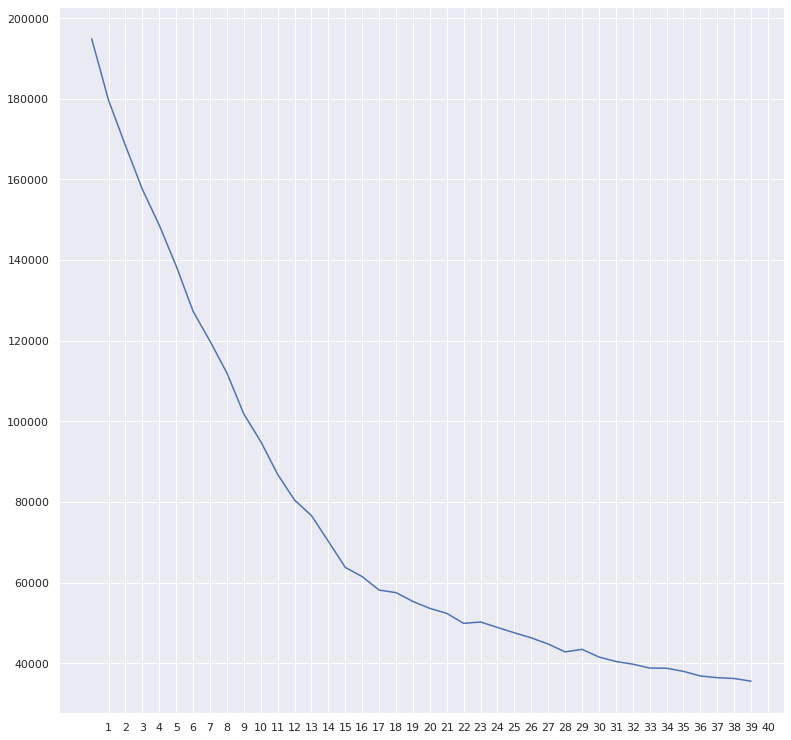

In [72]:
resultado.inertia.plot(xticks=resultado.grupos)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7feebc7ea438>,
      dtype=object)

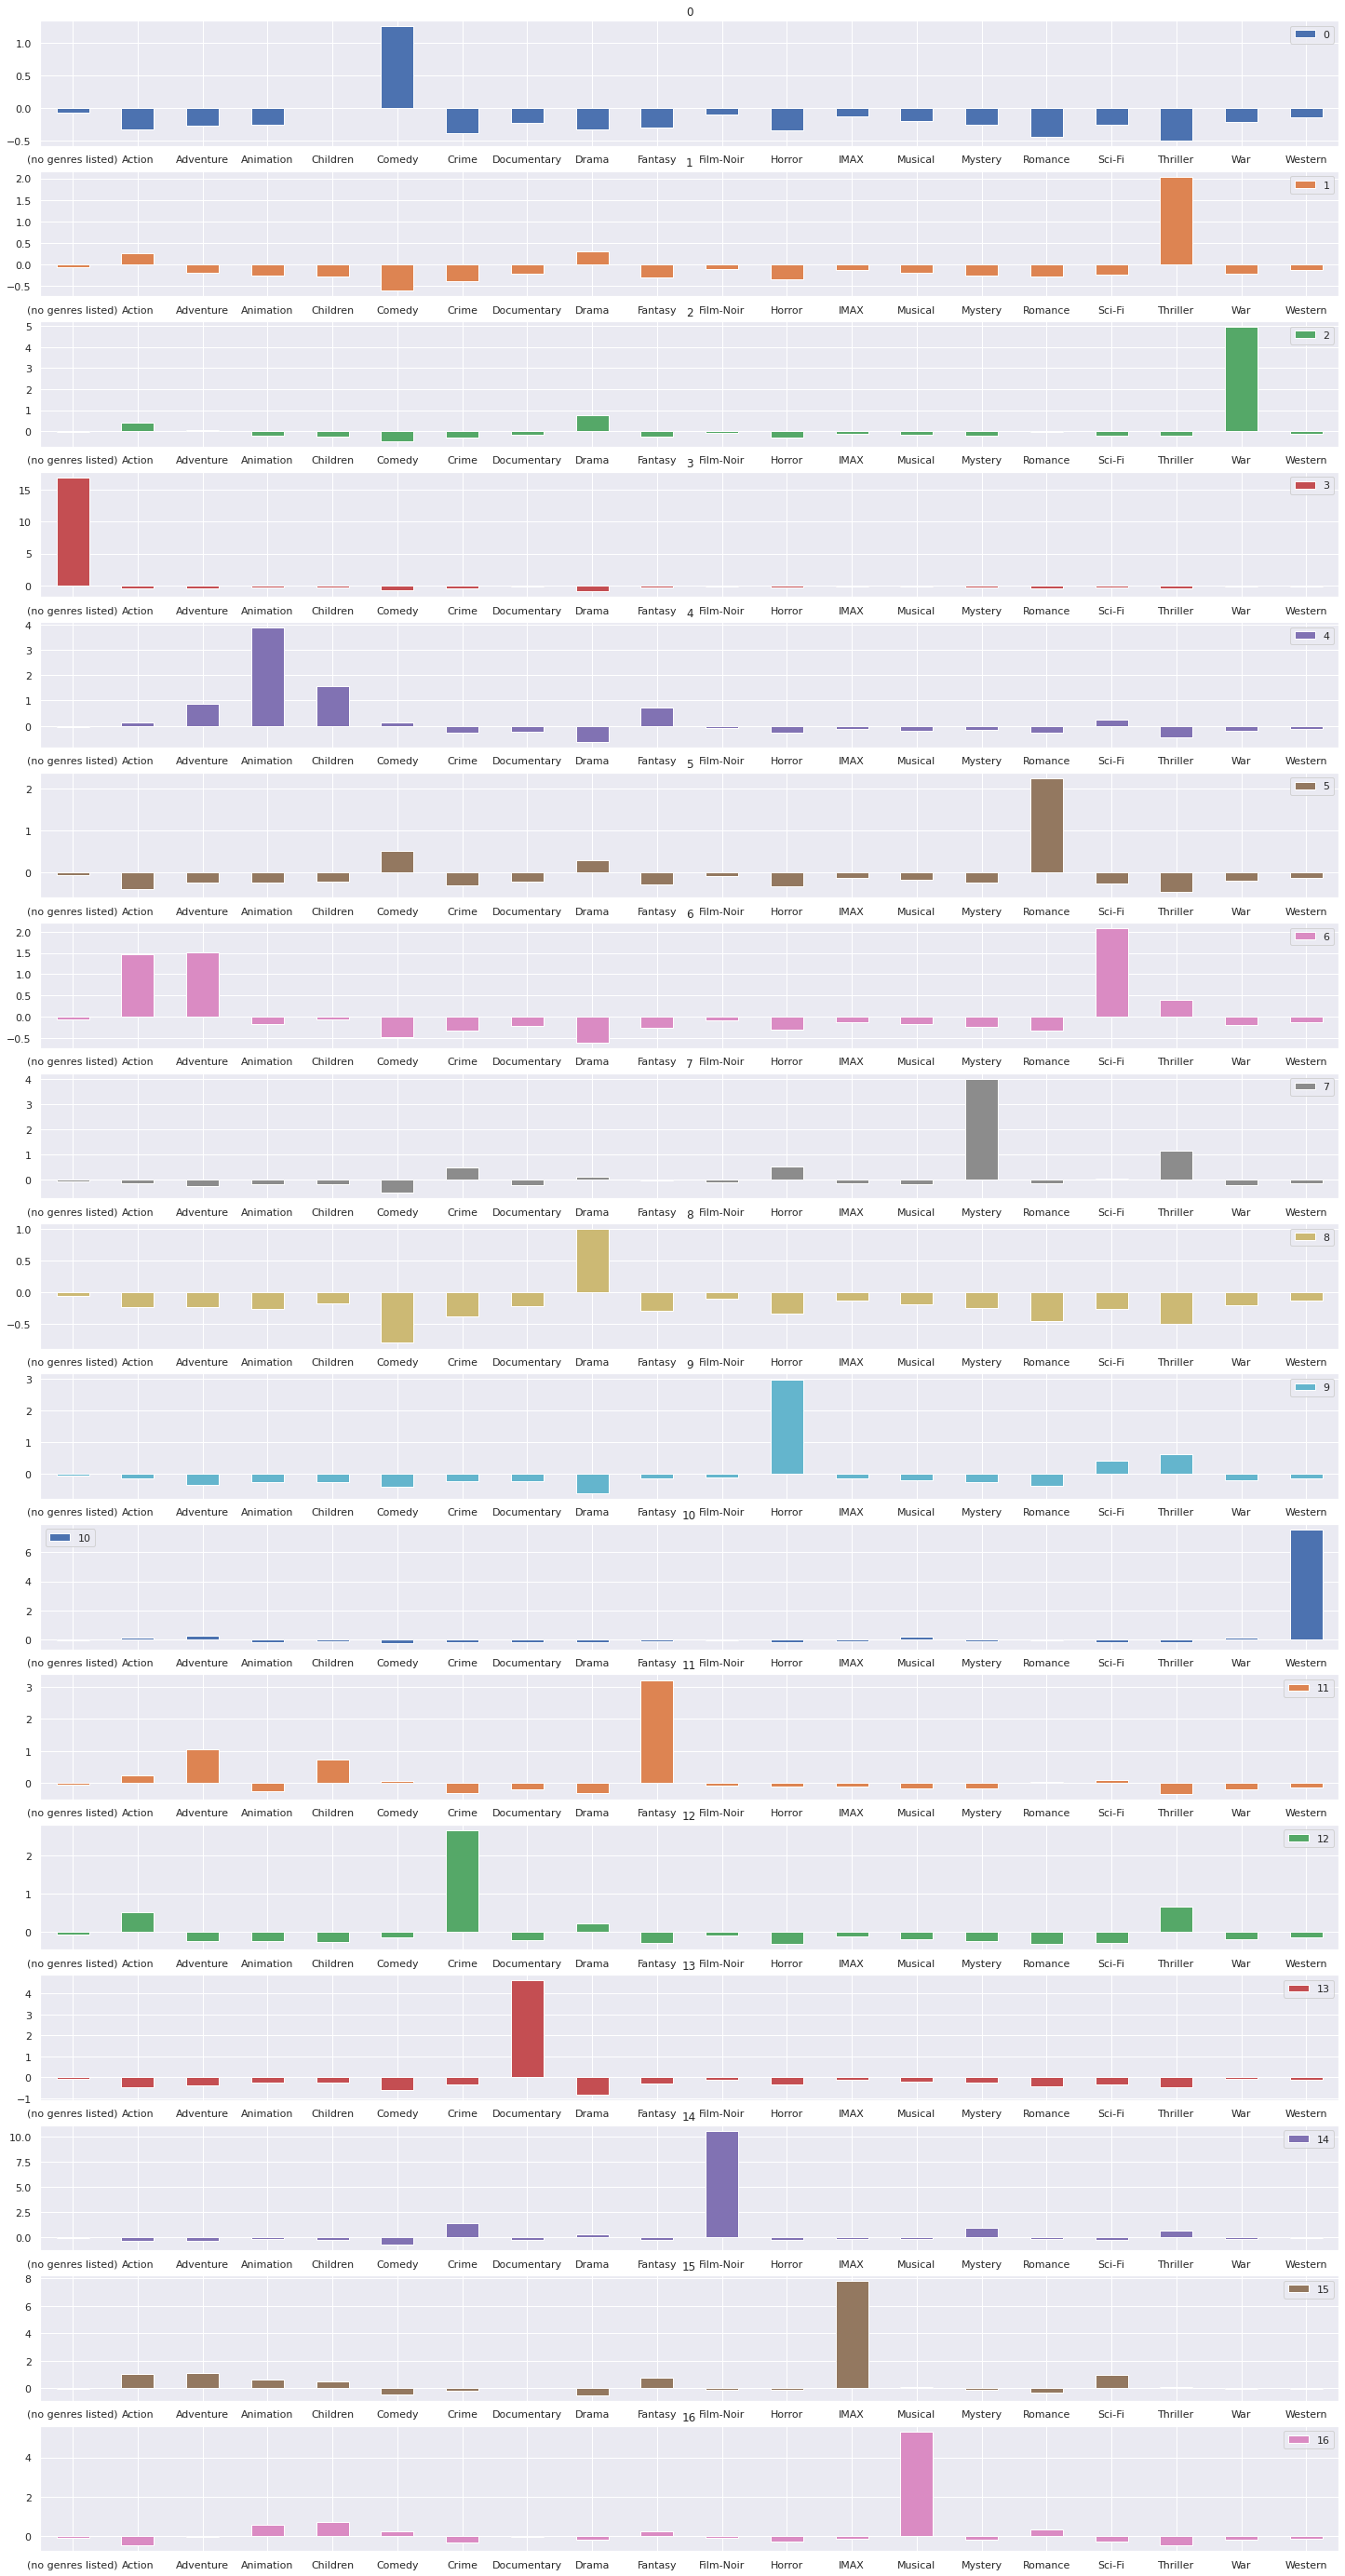

In [73]:
modelo = KMeans(n_clusters=17)
modelo.fit(generos_escalados)
grupos = pd.DataFrame(modelo.cluster_centers_, columns = generos.columns)
grupos.transpose().plot.bar(subplots=True, figsize=(25, 50), sharex=False, rot=0)